In [ ]:
import time
starting_time = time.time()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Random_state & test_size**

In [ ]:
RANDOM_STATE = 2023
TEST_SIZE = 0.3
RUN_HYPERPARAMETER_SEARCH = False

In [ ]:
df = pd.read_csv('/content/hotel_booking1.csv')
df.head(10)

,hotel,is_canceled,lead_time,market_segment,is_repeated_guest,previous_cancellations,reserved_room_type,booking_changes,deposit_type,adr,reservation_status_date,name,phone-number
0,Resort Hotel,0,342,Direct,0,0,C,3,No Deposit,0.0,7/1/2015,Ernest Barnes,669-792-1661
1,Resort Hotel,0,737,Direct,0,0,C,4,No Deposit,0.0,7/1/2015,Andrea Baker,858-637-6955
2,Resort Hotel,0,7,Direct,0,0,A,0,No Deposit,75.0,7/2/2015,Rebecca Parker,652-885-2745
3,Resort Hotel,0,13,Corporate,0,0,A,0,No Deposit,75.0,7/2/2015,Laura Murray,364-656-8427
4,Resort Hotel,0,14,Online TA,0,0,A,0,No Deposit,98.0,7/3/2015,Linda Hines,713-226-5883
5,Resort Hotel,0,14,Online TA,0,0,A,0,No Deposit,98.0,7/3/2015,Jasmine Fletcher,190-271-6743
6,Resort Hotel,0,0,Direct,0,0,C,0,No Deposit,107.0,7/3/2015,Dylan Rangel,420-332-5209
7,Resort Hotel,0,9,Direct,0,0,C,0,No Deposit,103.0,7/3/2015,William Velez,286-669-4333
8,Resort Hotel,1,85,Online TA,0,0,A,0,No Deposit,82.0,5/6/2015,Steven Murphy,341-726-5787
9,Resort Hotel,1,75,Offline TA/TO,0,0,D,0,No Deposit,105.5,4/22/2015,Michael Moore,316-648-6176


In [ ]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Salin dataframe dulu agar tidak mengubah aslinya
dfnew = df.copy()

# Mapping market_segment → numerik
marketsegment_map = {
    'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
    'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7
}
dfnew['Kategori Kehadiran'] = dfnew['market_segment'].map(marketsegment_map)

# Mapping reserved_room_type → numerik
reserved_room_map = {
    'A': 0, 'B': 1, 'C': 2, 'D': 3,
    'E': 4, 'F': 5, 'G': 6, 'H': 7,
    'L': 8
}
dfnew['Tipe Kamar Dipesan'] = dfnew['reserved_room_type'].map(reserved_room_map)

# Mapping deposit_type → numerik
deposit_type_map = {
    'No Deposit': 0,
    'Refundable': 1,
    'Non Refund': 2
}
dfnew['Tipe Deposit'] = dfnew['deposit_type'].map(deposit_type_map)

# Lihat hasil
dfnew[['market_segment', 'Kategori Kehadiran', 'reserved_room_type', 'Tipe Kamar Dipesan', 'deposit_type', 'Tipe Deposit']]


,market_segment,Kategori Kehadiran,reserved_room_type,Tipe Kamar Dipesan,deposit_type,Tipe Deposit
0,Direct,0,C,2.0,No Deposit,0
1,Direct,0,C,2.0,No Deposit,0
2,Direct,0,A,0.0,No Deposit,0
3,Corporate,1,A,0.0,No Deposit,0
4,Online TA,2,A,0.0,No Deposit,0
...,...,...,...,...,...,...
119385,Offline TA/TO,3,A,0.0,No Deposit,0
119386,Online TA,2,E,4.0,No Deposit,0
119387,Online TA,2,D,3.0,No Deposit,0
119388,Online TA,2,A,0.0,No Deposit,0


In [ ]:
df.shape

(119390, 13)

In [ ]:
dfnew.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
market_segment,0
is_repeated_guest,0
previous_cancellations,0
reserved_room_type,0
booking_changes,0
deposit_type,0
adr,0


In [ ]:
# Convert to numeric, coercing errors, then fill NaNs with the mode
dfnew['Tipe Kamar Dipesan'] = pd.to_numeric(dfnew['Tipe Kamar Dipesan'], errors='coerce')
dfnew['Tipe Kamar Dipesan'] = dfnew['Tipe Kamar Dipesan'].fillna(dfnew['Tipe Kamar Dipesan'].mode()[0])

# Re-check for missing values in the relevant columns used for SMOTE
print(dfnew[['Tipe Kamar Dipesan', 'lead_time', 'previous_cancellations', 'booking_changes', 'adr', 'Kategori Kehadiran', 'Tipe Deposit']].isnull().sum())

Tipe Kamar Dipesan        0
lead_time                 0
previous_cancellations    0
booking_changes           0
adr                       0
Kategori Kehadiran        0
Tipe Deposit              0
dtype: int64


In [ ]:
dfnew.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
market_segment,0
is_repeated_guest,0
previous_cancellations,0
reserved_room_type,0
booking_changes,0
deposit_type,0
adr,0


#**EDA**

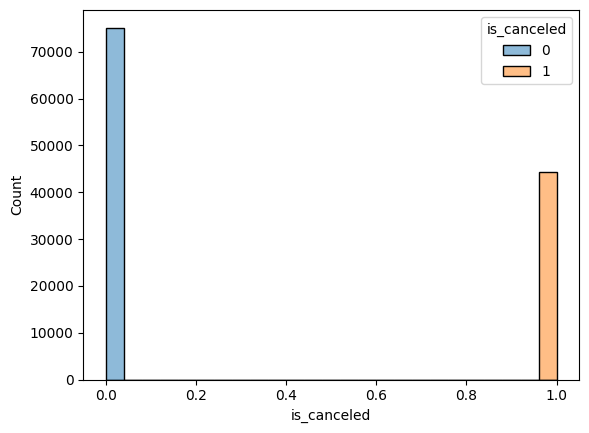

In [ ]:
# hue @ membagi data menjadi beberapa kategori or kelompok
ax = sns.histplot(x = 'is_canceled', data = dfnew, hue = 'is_canceled')
#0 (tidak batal) dan 1 (batal)

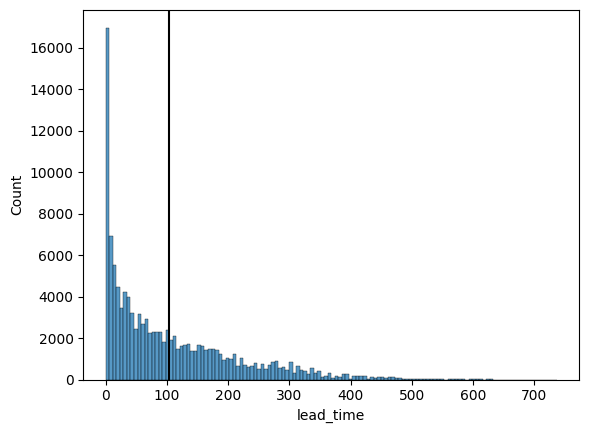

In [ ]:
ax = sns.histplot(x = 'lead_time', data = dfnew)
ax.axvline(df['lead_time'].mean(), color = 'black')

<Axes: xlabel='Kategori Kehadiran', ylabel='Count'>

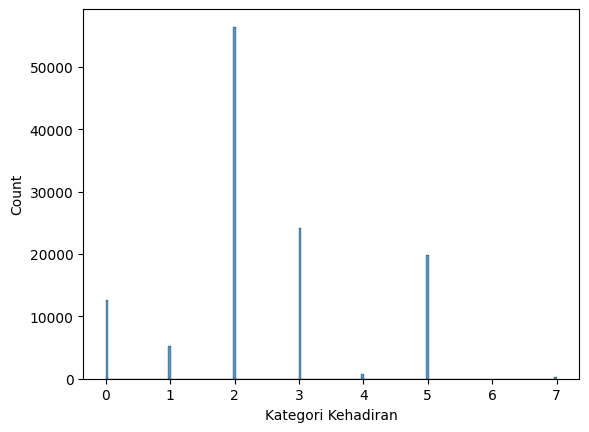

In [ ]:
sns.histplot(x = 'Kategori Kehadiran', data = dfnew)

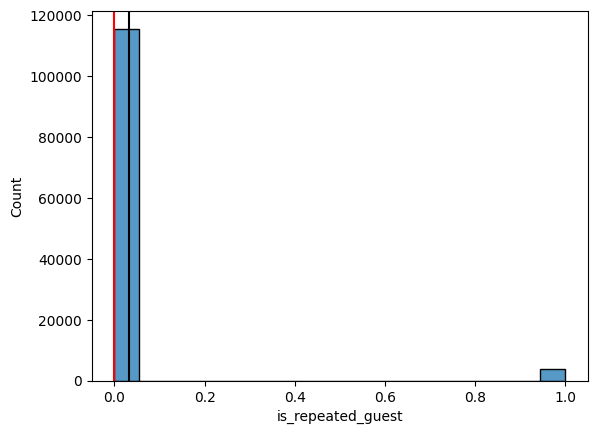

In [ ]:
ax = sns.histplot(x = 'is_repeated_guest', data = dfnew)
ax.axvline(dfnew['is_repeated_guest'].mean(), color = 'black')
ax.axvline(dfnew['is_repeated_guest'].median(), color = 'red')

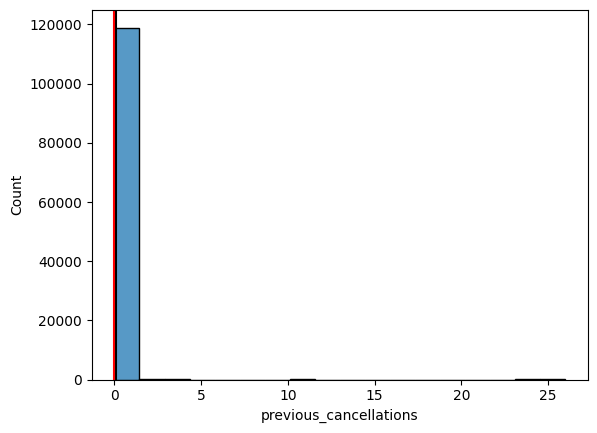

In [ ]:
ax = sns.histplot(x = 'previous_cancellations', data = dfnew)
ax.axvline(dfnew['previous_cancellations'].mean(), color = 'black')
ax.axvline(dfnew['previous_cancellations'].median(), color = 'red')

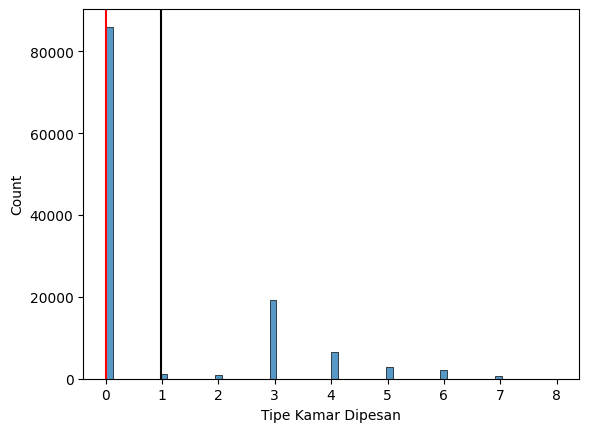

In [ ]:
ax = sns.histplot(x = 'Tipe Kamar Dipesan', data = dfnew)
ax.axvline(dfnew['Tipe Kamar Dipesan'].mean(), color = 'black')
ax.axvline(dfnew['Tipe Kamar Dipesan'].median(), color = 'red')

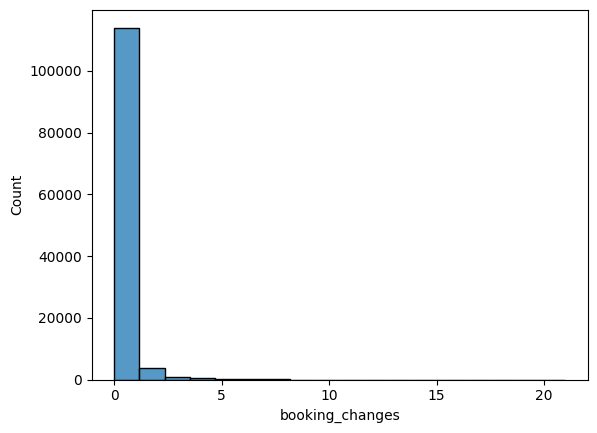

In [ ]:
ax = sns.histplot(x = 'booking_changes', data = dfnew)

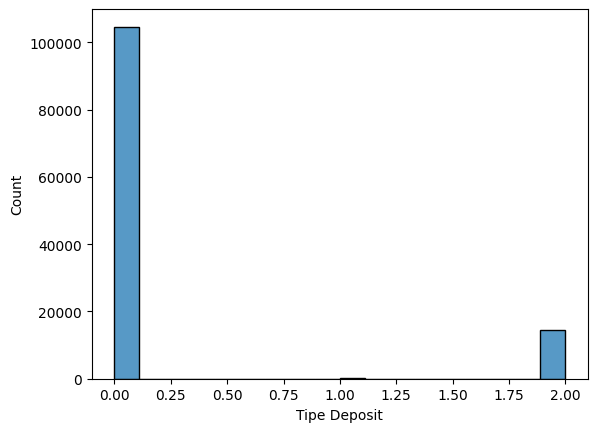

In [ ]:
ax = sns.histplot(x = 'Tipe Deposit', data = dfnew)

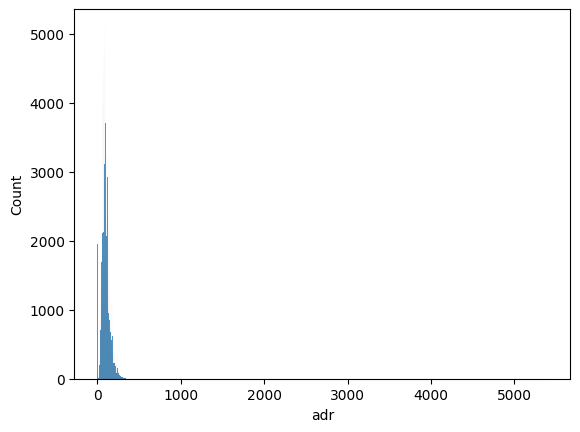

In [ ]:
ax = sns.histplot(x = 'adr', data = dfnew)

In [ ]:
print("\nValue counts for 'lead_time':")
print(dfnew['lead_time'].value_counts())

print("\nValue counts for 'previous_cancellations':")
print(dfnew['previous_cancellations'].value_counts())

print("\nValue counts for 'booking_changes':")
print(dfnew['booking_changes'].value_counts())

In [ ]:
# Exclude non-numeric columns before calculating correlation
dfnew_numeric = dfnew.select_dtypes(include=np.number)
dfnew_numeric.corr()

,is_canceled,lead_time,is_repeated_guest,previous_cancellations,booking_changes,adr,Kategori Kehadiran,Tipe Kamar Dipesan,Tipe Deposit
is_canceled,1.000000,0.293123,-0.084793,0.110133,-0.144381,0.047557,0.238335,-0.062045,0.480434
lead_time,0.293123,1.000000,-0.124410,0.086042,0.000149,-0.063077,0.398615,-0.105687,0.380804
is_repeated_guest,-0.084793,-0.124410,1.000000,0.082293,0.012092,-0.134314,-0.096533,-0.029473,-0.058461
previous_cancellations,0.110133,0.086042,0.082293,1.000000,-0.026993,-0.065646,0.092333,-0.048807,0.142985
booking_changes,-0.144381,0.000149,0.012092,-0.026993,1.000000,0.019618,-0.060075,0.045291,-0.118058
adr,0.047557,-0.063077,-0.134314,-0.065646,0.019618,1.000000,-0.233289,0.393568,-0.088587
Kategori Kehadiran,0.238335,0.398615,-0.096533,0.092333,-0.060075,-0.233289,1.000000,-0.251975,0.458255
Tipe Kamar Dipesan,-0.062045,-0.105687,-0.029473,-0.048807,0.045291,0.393568,-0.251975,1.000000,-0.201888
Tipe Deposit,0.480434,0.380804,-0.058461,0.142985,-0.118058,-0.088587,0.458255,-0.201888,1.000000


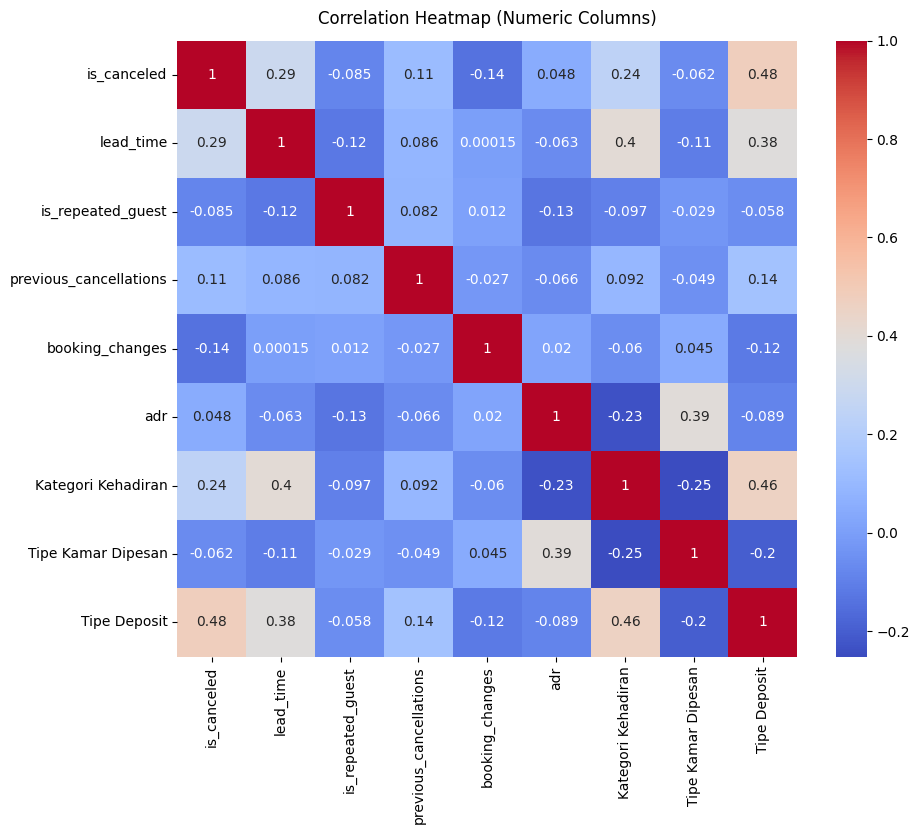

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(dfnew_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns)', fontdict={'fontsize': 12}, pad=12)
plt.show()

## **Bivariate**

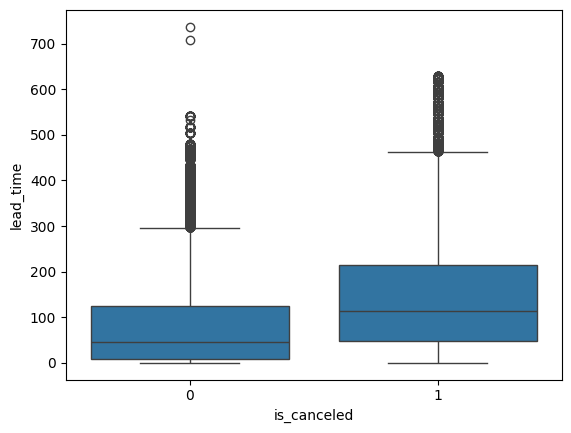

In [ ]:
ax = sns.boxplot(x= dfnew['is_canceled'],
                 y = dfnew['lead_time'])

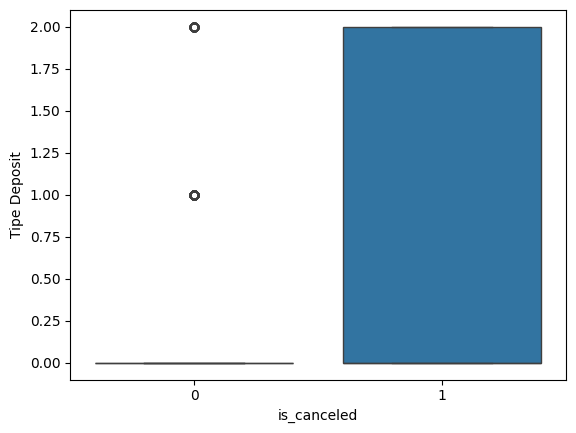

In [ ]:
ax = sns.boxplot(x= dfnew['is_canceled'],
                 y = dfnew['Tipe Deposit'])

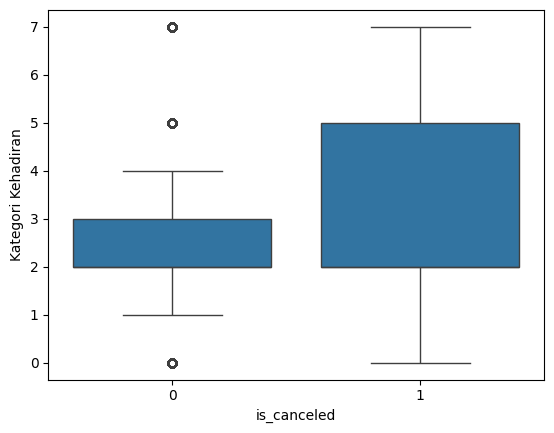

In [ ]:
ax = sns.boxplot(x= dfnew['is_canceled'],
                 y = dfnew['Kategori Kehadiran'])

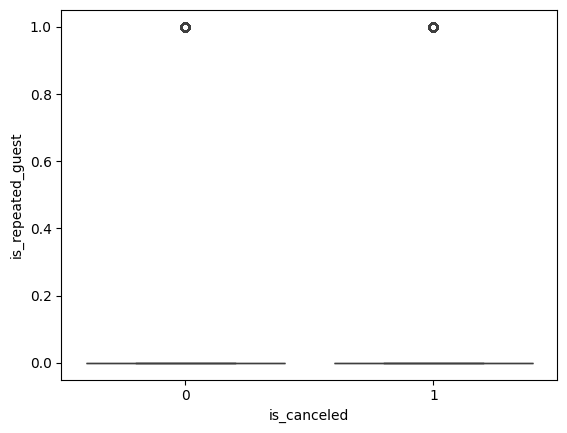

In [ ]:
ax = sns.boxplot(x= dfnew['is_canceled'],
                 y = dfnew['is_repeated_guest'])

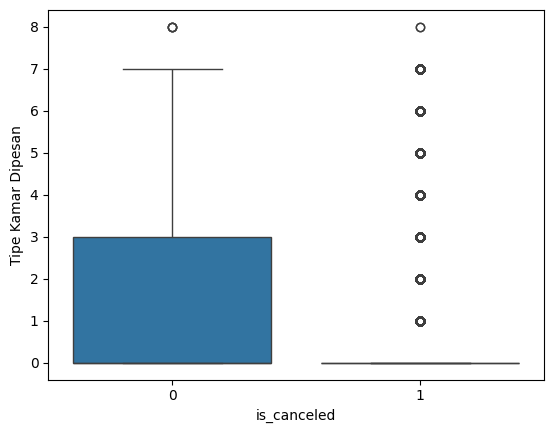

In [ ]:
ax = sns.boxplot(x= dfnew['is_canceled'],
                 y = dfnew['Tipe Kamar Dipesan'])

##**Multivariate**

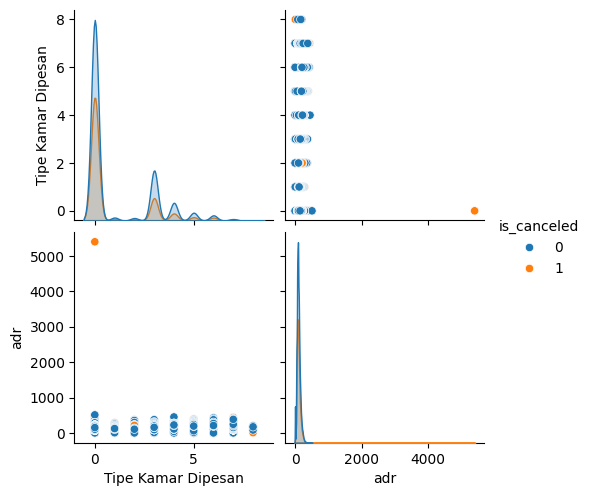

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= sns.pairplot(dfnew[['Tipe Kamar Dipesan', 'adr', 'is_canceled']], hue='is_canceled')
plt.show()

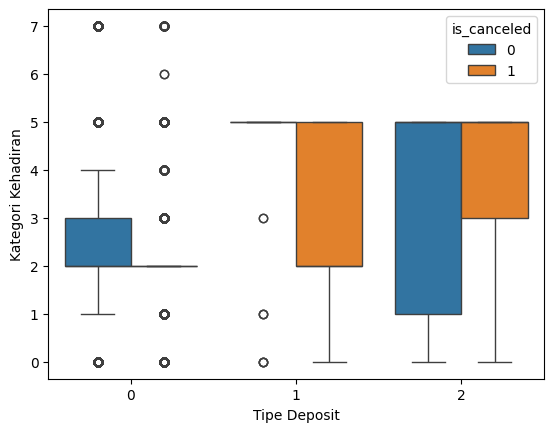

In [ ]:
ax= sns.boxplot(x= dfnew['Tipe Deposit'],
                y= dfnew['Kategori Kehadiran'],
                hue = 'is_canceled',
                data = dfnew)

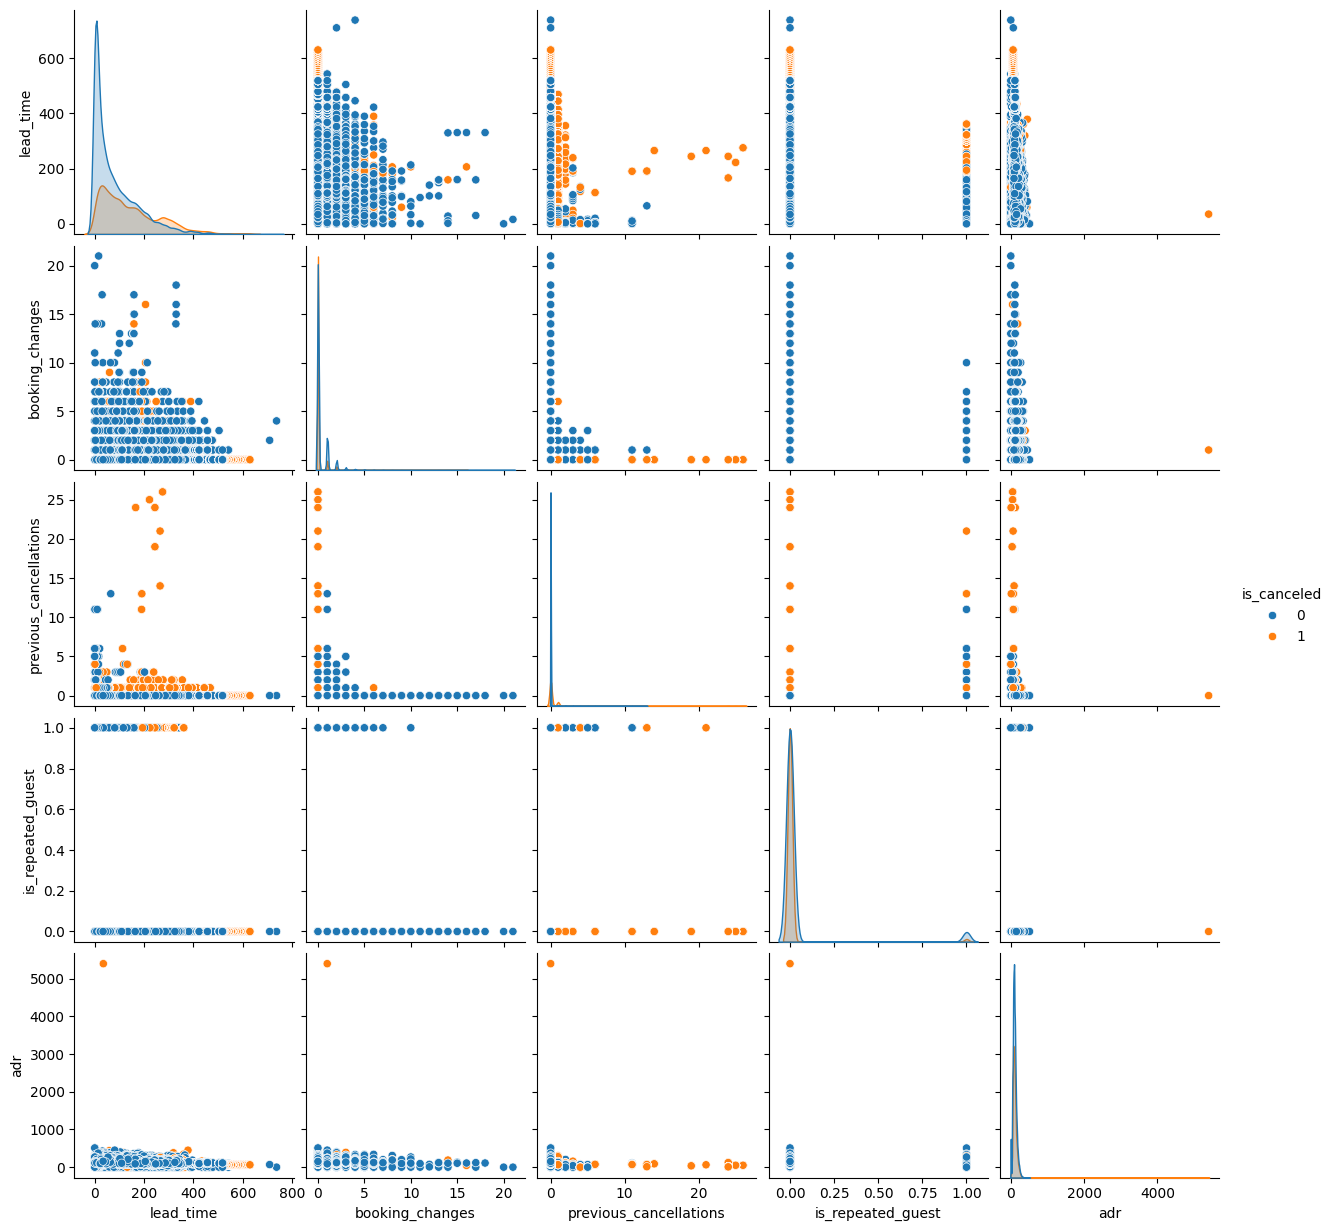

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['lead_time', 'booking_changes', 'previous_cancellations',
                 'is_repeated_guest', 'adr', 'is_canceled']], hue='is_canceled')
plt.show()

#**DATA PREPROCESSING**

##**Data Outlier**

In [ ]:
#outlier pada feature lead_time, previous_cancellations, booking_changes, dan adr
deskripsi_data= dfnew.describe(percentiles = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]).T
deskripsi_data

,count,mean,std,min,1%,10%,20%,30%,40%,50%,60%,70%,80%,90%,99%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.00,1.0,1.0,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,0.0,3.0,11.0,26.0,45.0,69.000,99.0,138.00,184.0,265.0,444.0,737.0
is_repeated_guest,119390.0,0.031912,0.175767,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,1.0,1.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,1.0,26.0
booking_changes,119390.0,0.221124,0.652306,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,1.0,3.0,21.0
adr,119390.0,101.831122,50.535790,-6.38,0.0,50.0,64.0,75.0,85.0,94.575,105.0,118.15,135.0,164.0,252.0,5400.0
Kategori Kehadiran,119390.0,2.467577,1.420967,0.00,0.0,0.0,2.0,2.0,2.0,2.000,2.0,3.00,3.0,5.0,5.0,7.0
Tipe Kamar Dipesan,119390.0,0.988600,1.695410,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,3.0,4.0,6.0,8.0
Tipe Deposit,119390.0,0.245716,0.655517,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,2.0,2.0,2.0


In [ ]:
deskripsi_data.to_excel('deskripsi_data.xlsx', index = True)

##**Filter lead_time**

In [ ]:
#Percentile method handle negatif variabel leadtime
upper_lead_time= df['lead_time'].quantile(0.80)
lower_lead_time = df['lead_time'].quantile(0.20)
print('upper lead time:', upper_lead_time)
print('lower lead time:', lower_lead_time)

upper lead time: 184.0
lower lead time: 11.0


##**Trimming delete outlier**

In [ ]:
new_df = dfnew.loc[(dfnew['lead_time']<= upper_lead_time) & (dfnew['lead_time']>= lower_lead_time)]

print ('before removing outlier:', len(dfnew))
print ('after removing outlier:', len(new_df))
print('outliers:',len(dfnew) - len(new_df))

before removing outlier: 119390
after removing outlier: 72791
outliers: 46599


##**Teknik Clipping**

In [ ]:
# capping mengubah nilai outlier ke batas atas atau batas bawah, tanpa kehilangan data
dfnew['lead_time'] = dfnew['lead_time'].clip(lower=lower_lead_time, upper=upper_lead_time)

<Axes: xlabel='lead_time'>

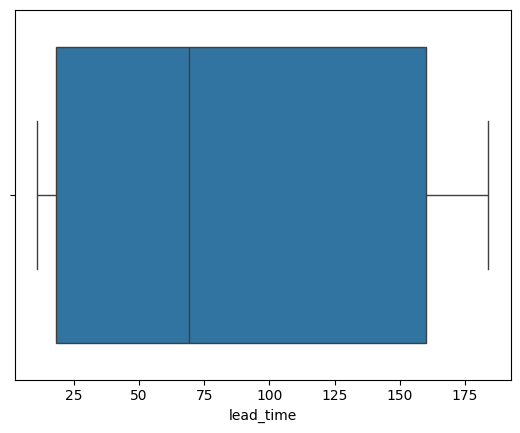

In [ ]:
sns.boxplot (x = 'lead_time', data = dfnew)

## **Filter Previous** **Cancelation**

In [ ]:
#Percentile method handle negatif variabel previous_cancellations
upper_lead_time= dfnew['previous_cancellations'].quantile(0.99)
lower_lead_time = dfnew['previous_cancellations'].quantile(0.50)
print('upper previous_cancellations:', upper_lead_time)
print('lower previous_cancellations:', lower_lead_time)

upper previous_cancellations: 1.0
lower previous_cancellations: 0.0


##**Trimming delete outlier**

In [ ]:
new_df = dfnew.loc[(dfnew['previous_cancellations']<= upper_lead_time) & (dfnew['previous_cancellations']>= lower_lead_time)]

print ('before removing outlier:', len(dfnew))
print ('after removing outlier:', len(new_df))
print('outliers:',len(dfnew) - len(new_df))

before removing outlier: 119390
after removing outlier: 118957
outliers: 433


##**Teknik Clipping**

In [ ]:
# capping mengubah nilai outlier ke batas atas atau batas bawah, tanpa kehilangan data
dfnew['lead_time'] = dfnew['lead_time'].clip(lower=lower_lead_time, upper=upper_lead_time)

<Axes: xlabel='lead_time'>

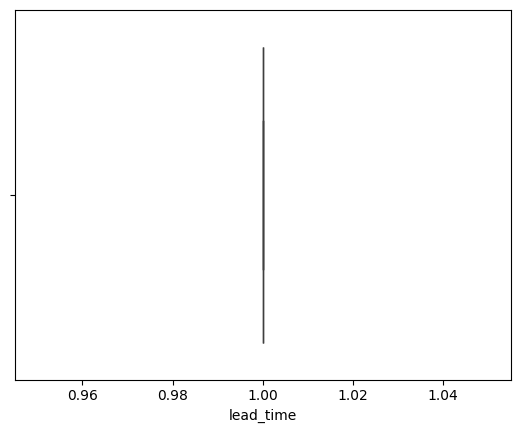

In [ ]:
sns.boxplot (x = 'lead_time', data = dfnew)

##**Filter Booking Changes**

In [ ]:
#Percentile method handle negatif variabel booking_changes
upper_booking_changes= dfnew['booking_changes'].quantile(0.99)
lower_booking_changes = dfnew['booking_changes'].quantile(0.70)
print('upper booking_changes:', upper_booking_changes)
print('lower booking_changes:', lower_booking_changes)

upper booking_changes: 3.0
lower booking_changes: 0.0


##**Trimming delete outlier**

In [ ]:
new_df = dfnew.loc[(dfnew['booking_changes']<= upper_lead_time) & (dfnew['booking_changes']>= lower_lead_time)]

print ('before removing outlier:', len(dfnew))
print ('after removing outlier:', len(new_df))
print('outliers:',len(dfnew) - len(new_df))

before removing outlier: 119390
after removing outlier: 114015
outliers: 5375


##**Teknik Clipping**

In [ ]:
# capping mengubah nilai outlier ke batas atas atau batas bawah, tanpa kehilangan data
dfnew['booking_changes'] = dfnew['booking_changes'].clip(lower=lower_booking_changes, upper=upper_booking_changes)

<Axes: xlabel='booking_changes'>

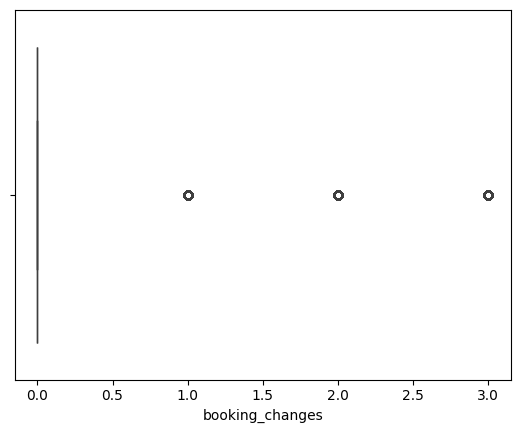

In [ ]:
sns.boxplot (x = 'booking_changes', data = dfnew)

##**Filter adr**

In [151]:
#Percentile method handle negatif variabel adr
upper_adr= dfnew['adr'].quantile(0.90)
lower_adr = dfnew['booking_changes'].quantile(0.20)
print('upper adr:', upper_adr)
print('lower adr:', lower_adr)

upper adr: 164.0
lower adr: 0.0


##**Trimming delete outlier**

In [152]:
new_df = dfnew.loc[(dfnew['adr']<= upper_adr) & (dfnew['adr']>= lower_adr)]

print ('before removing outlier:', len(dfnew))
print ('after removing outlier:', len(new_df))
print('outliers:',len(dfnew) - len(new_df))

before removing outlier: 119390
after removing outlier: 107459
outliers: 11931


##**Teknik Clipping**

In [153]:
# capping mengubah nilai outlier ke batas atas atau batas bawah, tanpa kehilangan data
dfnew['adr'] = dfnew['adr'].clip(lower=lower_adr, upper=upper_adr)

<Axes: xlabel='adr'>

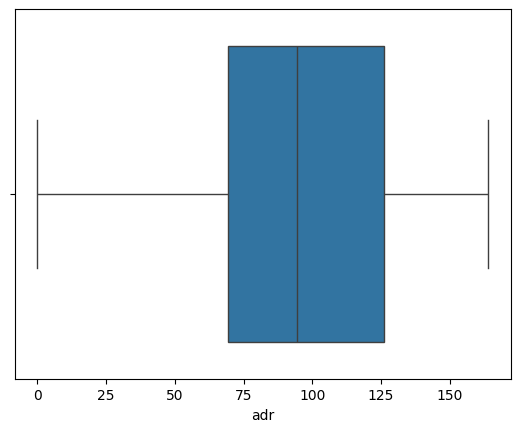

In [154]:
sns.boxplot (x = 'adr', data = dfnew)

In [155]:
dfnew.shape

(119390, 16)

In [156]:
dfnew.columns

Index(['hotel', 'is_canceled', 'lead_time', 'market_segment',
       'is_repeated_guest', 'previous_cancellations', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'adr', 'reservation_status_date',
       'name', 'phone-number', 'Kategori Kehadiran', 'Tipe Kamar Dipesan',
       'Tipe Deposit'],
      dtype='object')

# **Feature** **Engine**

In [157]:
selected_features =['hotel', 'is_canceled', 'lead_time', 'market_segment',
       'is_repeated_guest', 'previous_cancellations', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'adr', 'reservation_status_date',
       'name', 'phone-number', 'Kategori Kehadiran', 'Tipe Kamar Dipesan',
       'Tipe Deposit']

selected_data = dfnew[selected_features]
selected_data.head()

,hotel,is_canceled,lead_time,market_segment,is_repeated_guest,previous_cancellations,reserved_room_type,booking_changes,deposit_type,adr,reservation_status_date,name,phone-number,Kategori Kehadiran,Tipe Kamar Dipesan,Tipe Deposit
0,Resort Hotel,0,1,Direct,0,0,C,3,No Deposit,0.0,7/1/2015,Ernest Barnes,669-792-1661,0,2.0,0
1,Resort Hotel,0,1,Direct,0,0,C,3,No Deposit,0.0,7/1/2015,Andrea Baker,858-637-6955,0,2.0,0
2,Resort Hotel,0,1,Direct,0,0,A,0,No Deposit,75.0,7/2/2015,Rebecca Parker,652-885-2745,0,0.0,0
3,Resort Hotel,0,1,Corporate,0,0,A,0,No Deposit,75.0,7/2/2015,Laura Murray,364-656-8427,1,0.0,0
4,Resort Hotel,0,1,Online TA,0,0,A,0,No Deposit,98.0,7/3/2015,Linda Hines,713-226-5883,2,0.0,0


In [158]:
# Belum Normalisasi
X = selected_data.iloc[:,:-1]
y = selected_data['is_canceled']

In [174]:
X

,is_repeated_guest,previous_cancellations,booking_changes,adr,Kategori Kehadiran,Tipe Kamar Dipesan,Tipe Deposit,lead_time,hotel_Resort Hotel
0,0,0,3,0.00,0,2.0,0,1,True
1,0,0,3,0.00,0,2.0,0,1,True
2,0,0,0,75.00,0,0.0,0,1,True
3,0,0,0,75.00,1,0.0,0,1,True
4,0,0,0,98.00,2,0.0,0,1,True
...,...,...,...,...,...,...,...,...,...
119385,0,0,0,96.14,3,0.0,0,1,False
119386,0,0,0,164.00,2,4.0,0,1,False
119387,0,0,0,157.71,2,3.0,0,1,False
119388,0,0,0,104.40,2,0.0,0,1,False


In [177]:
X[X['lead_time']<0]['lead_time'].count()

np.int64(0)

In [175]:
# Select relevant features, including the original 'hotel' column for one-hot encoding
features = ['hotel', 'is_repeated_guest', 'previous_cancellations',
            'booking_changes', 'adr', 'Kategori Kehadiran', 'Tipe Kamar Dipesan', 'Tipe Deposit', 'lead_time']

X = dfnew[features].copy()

# One-hot encode the 'hotel' column
X = pd.get_dummies(X, columns=['hotel'], drop_first=True)

# Separate target variable
y = dfnew['is_canceled']

# **Balancing Data**

In [161]:
selected_data['is_canceled'].value_counts()

,count
is_canceled,
0,75166
1,44224


In [162]:
# menghitung persentase berapa banyak
selected_data['is_canceled'].value_counts() / dfnew.shape[0] * 100

,count
is_canceled,
0,62.958372
1,37.041628


# **Over Sampling - SMOTE**

In [239]:
# teknik ini menghasilkan sampel tiruan lalu mengabungkan ke data minoritas

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = RANDOM_STATE,
              sampling_strategy = 'auto') #buat sample sintesis minor seimbang mendekati data mayoritas


In [240]:
X_res, y_res = smote.fit_resample(X, y)

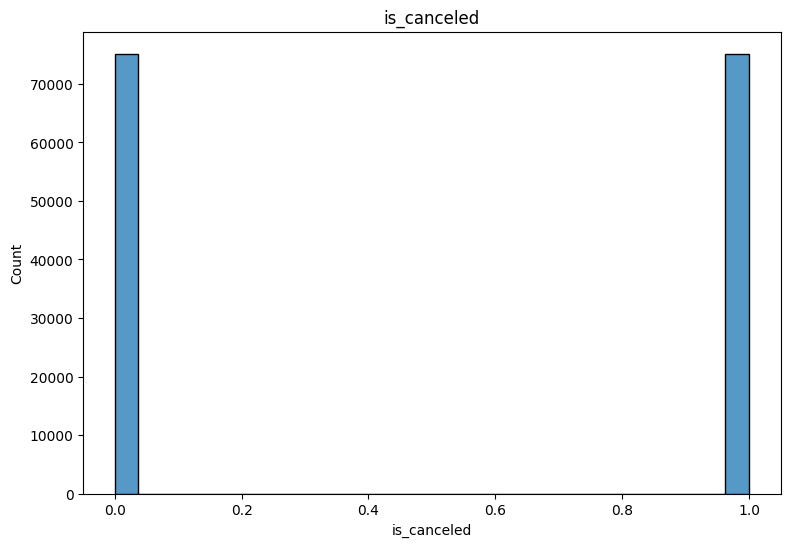

In [165]:
fig = plt.subplots(figsize = (9,6)) # figsize ukuran plot
sns.histplot(data = y_res)
plt.title('is_canceled')
plt.show()

In [166]:
X_res

,is_repeated_guest,previous_cancellations,booking_changes,adr,Kategori Kehadiran,Tipe Kamar Dipesan,Tipe Deposit,lead_time,hotel_Resort Hotel
0,0,0,3,0.0,0,2.0,0,1,True
1,0,0,3,0.0,0,2.0,0,1,True
2,0,0,0,75.0,0,0.0,0,1,True
3,0,0,0,75.0,1,0.0,0,1,True
4,0,0,0,98.0,2,0.0,0,1,True
...,...,...,...,...,...,...,...,...,...
150327,0,0,0,130.0,3,0.0,2,1,False
150328,0,0,0,89.0,3,0.0,2,1,False
150329,0,0,0,111.0,2,0.0,0,1,False
150330,0,0,0,89.1,2,0.0,0,1,False


# **Split Data**

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_res,
                                                    y_res,
                                                    test_size=TEST_SIZE,
                                                    random_state = RANDOM_STATE)

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# **Modeling Sc**

##**Logistic Reggresion**

In [242]:
model_lg = LogisticRegression()

# X_train @ data yg sudah di Standar Scalling
model_lg.fit(X_train, y_train)

LogisticRegression()

In [243]:
pred_lg1 = model_lg.predict(X_test)


##**Random Forest**

In [244]:
# Random Forest --> kumpulan dari Decision Tree
# Kategori ensemble learning: menggunakan teknik voting dri model utk
# mengeluarkan jawaban terakhir
#  n_estimator @ brp banyak jumlah pohon keputusan

model_rf = RandomForestClassifier(n_estimators = 500,
                                  random_state = RANDOM_STATE)
model_rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500, random_state=2023)

In [245]:
pred_rf1 = model_rf.predict(X_test)

#**Model Performance Evaluation**

In [179]:
from sklearn.metrics import confusion_matrix, classification_report

##**Logistic Regression**

In [185]:
# Model Logistic Regression
print(classification_report(pred_lg1, y_test))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74     31237
           1       0.50      0.80      0.61     13863

    accuracy                           0.69     45100
   macro avg       0.69      0.72      0.68     45100
weighted avg       0.76      0.69      0.70     45100



In [186]:
conf_matrix_lg1 = confusion_matrix(pred_lg1, y_test)
print(conf_matrix_lg1)

[[19924 11313]
 [ 2713 11150]]


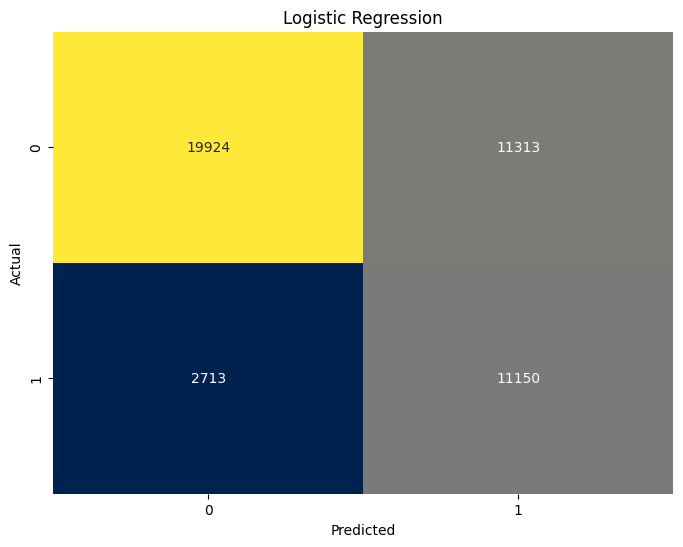

In [187]:
plt.figure(figsize=(8, 6))
# annot @ menentukan nilai sebenarnya akan ditampilkan pd sel heatmap or tdk
# fmt @ dalam bentuk format desimal
# cbar @ color bar
sns.heatmap(conf_matrix_lg1, annot=True, fmt="d", cmap = 'cividis', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression')
plt.show()

##**Random Forest**

In [188]:
# Model Random Forest
print(classification_report(pred_rf1, y_test))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75     21581
           1       0.78      0.74      0.76     23519

    accuracy                           0.76     45100
   macro avg       0.76      0.76      0.76     45100
weighted avg       0.76      0.76      0.76     45100



In [189]:
conf_matrix_rf1 = confusion_matrix(y_test, pred_rf1)
print(conf_matrix_rf1)

[[16588  6049]
 [ 4993 17470]]


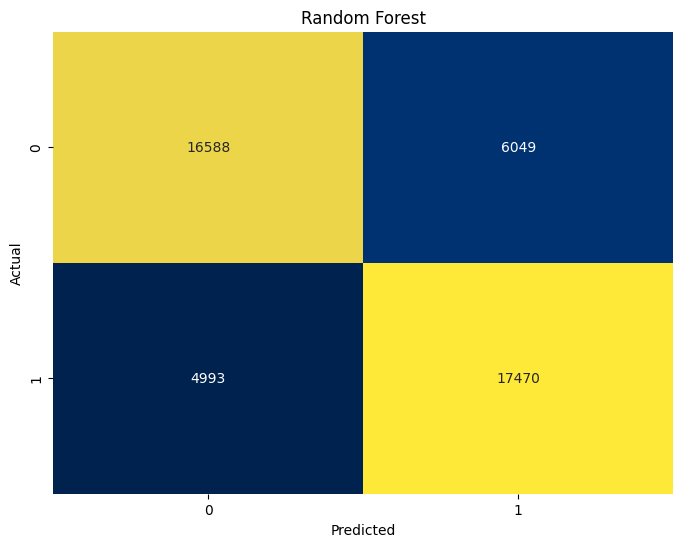

In [190]:
plt.figure(figsize=(8, 6))
# annot @ menentukan nilai sebenarnya akan ditampilkan pd sel heatmap or tdk
# fmt @ dalam bentuk format desimal
# cbar @ color bar
sns.heatmap(conf_matrix_rf1, annot=True, fmt="d", cmap = 'cividis', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest')
plt.show()

In [229]:
# XGB Classifier
from xgboost import XGBClassifier

In [230]:
model_xgboost = XGBClassifier()
model_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [231]:
pred_xgboost1 = model_xgboost.predict(X_test)

In [232]:
print(classification_report(pred_xgboost1, y_test))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74     23444
           1       0.71      0.74      0.73     21656

    accuracy                           0.73     45100
   macro avg       0.73      0.73      0.73     45100
weighted avg       0.73      0.73      0.73     45100



In [233]:
conf_matrix_xgboost1 = confusion_matrix(y_test, pred_xgboost1)
print(conf_matrix_xgboost1)

[[17020  5617]
 [ 6424 16039]]


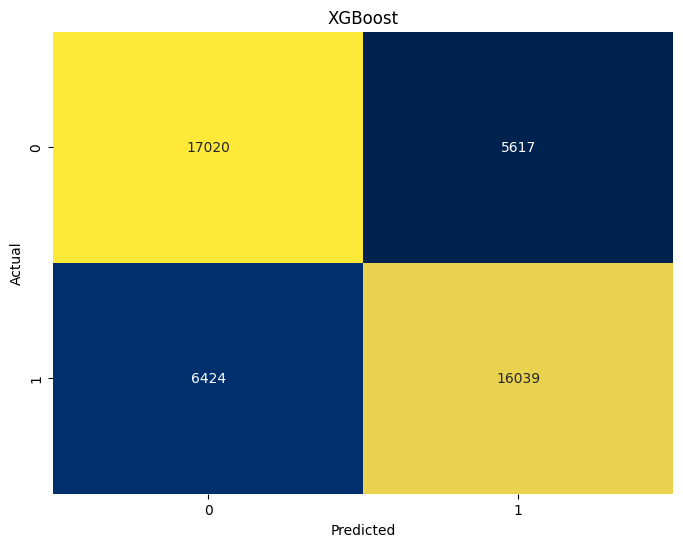

In [234]:
plt.figure(figsize=(8, 6))
# annot @ menentukan nilai sebenarnya akan ditampilkan pd sel heatmap or tdk
# fmt @ dalam bentuk format desimal
# cbar @ color bar
sns.heatmap(conf_matrix_xgboost1, annot=True, fmt="d", cmap = 'cividis', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost')
plt.show()

#**MinMaxScaler**

In [236]:
#mengambil data yg sudah di smothe
X_res, y_res

(array([[0., 0., 1., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 150327    1
 150328    1
 150329    1
 150330    1
 150331    1
 Name: is_canceled, Length: 150332, dtype: int64)

In [247]:
X_scale = X_res.values #format array
X_scale

array([[0, 0, 3, ..., 0, 1, True],
       [0, 0, 3, ..., 0, 1, True],
       [0, 0, 0, ..., 0, 1, True],
       ...,
       [0, 0, 0, ..., 0, 1, False],
       [0, 0, 0, ..., 0, 1, False],
       [0, 0, 0, ..., 0, 1, True]], dtype=object)

In [248]:
# mengubah rentang  nilai 0 dan 1 dri fitur / kolom
min_max_scaler = MinMaxScaler()
X_MinMax = min_max_scaler.fit_transform(X_scale)


In [249]:
print("Data yang sudah di-Min-Max scaler:")
print(X_MinMax)

Data yang sudah di-Min-Max scaler:
[[0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [250]:
min_values = np.min(X_MinMax, axis=0)
max_values = np.max(X_MinMax, axis=0)

print("Nilai minimum setiap kolom:", min_values)
print("Nilai maksimum setiap kolom:", max_values)

Nilai minimum setiap kolom: [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Nilai maksimum setiap kolom: [1. 1. 1. 1. 1. 1. 1. 0. 1.]


In [203]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_MinMax,
                                                    y_res,
                                                    test_size = TEST_SIZE,
                                                    random_state = RANDOM_STATE)

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## **Logistic Regression**

In [205]:
model_lg2 = LogisticRegression()

# X_train @ data yg sudah di Standar Scalling
model_lg2.fit(X_train2, y_train2)

LogisticRegression()

In [206]:
pred_lg2 = model_lg2.predict(X_test2)

## RandomForestClassifier

In [207]:
model_rf2 = RandomForestClassifier(n_estimators = 500,
                                  random_state = RANDOM_STATE)
model_rf2.fit(X_train2, y_train2)


RandomForestClassifier(n_estimators=500, random_state=2023)

In [208]:
pred_rf2 = model_rf2.predict(X_test2)

# Model Performance Evaluation

In [209]:
from sklearn.metrics import confusion_matrix, classification_report

In [210]:
# Model Logistic Regression
print(classification_report(pred_lg2, y_test2))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74     31372
           1       0.49      0.80      0.61     13728

    accuracy                           0.69     45100
   macro avg       0.69      0.72      0.67     45100
weighted avg       0.76      0.69      0.70     45100



In [211]:
conf_matrix_lg2 = confusion_matrix(y_test2, pred_lg2)
print(conf_matrix_lg2)

[[19947  2690]
 [11425 11038]]


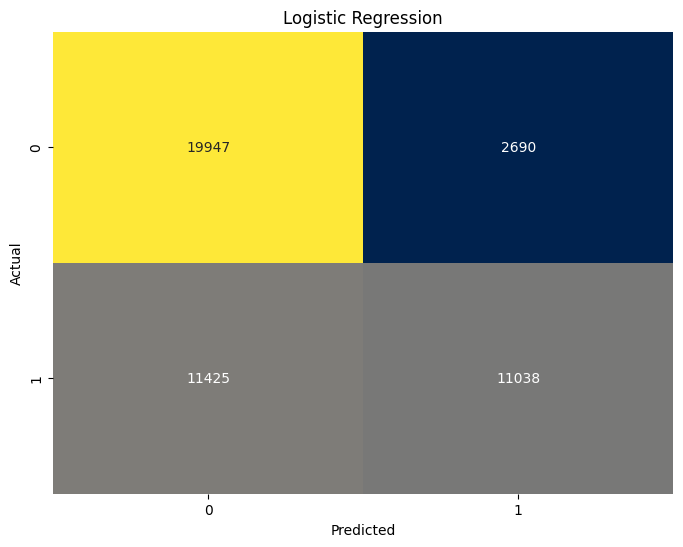

In [212]:
plt.figure(figsize=(8, 6))
# annot @ menentukan nilai sebenarnya akan ditampilkan pd sel heatmap or tdk
# fmt @ dalam bentuk format desimal
# cbar @ color bar
sns.heatmap(conf_matrix_lg2, annot=True, fmt="d", cmap = 'cividis', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression')
plt.show()

In [213]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test2, pred_lg2))
print(precision_score(y_test2, pred_lg2))
print(recall_score(y_test2, pred_lg2))
print(f1_score(y_test2, pred_lg2))

0.6870288248337029
0.8040501165501166
0.49138583448337264
0.6099859080986986


In [214]:
# Model Random Forest
print(classification_report(pred_rf2, y_test2))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75     21582
           1       0.78      0.74      0.76     23518

    accuracy                           0.76     45100
   macro avg       0.76      0.76      0.76     45100
weighted avg       0.76      0.76      0.76     45100



In [215]:
conf_matrix_rf2 = confusion_matrix(y_test2, pred_rf2)
print(conf_matrix_rf2)

[[16589  6048]
 [ 4993 17470]]


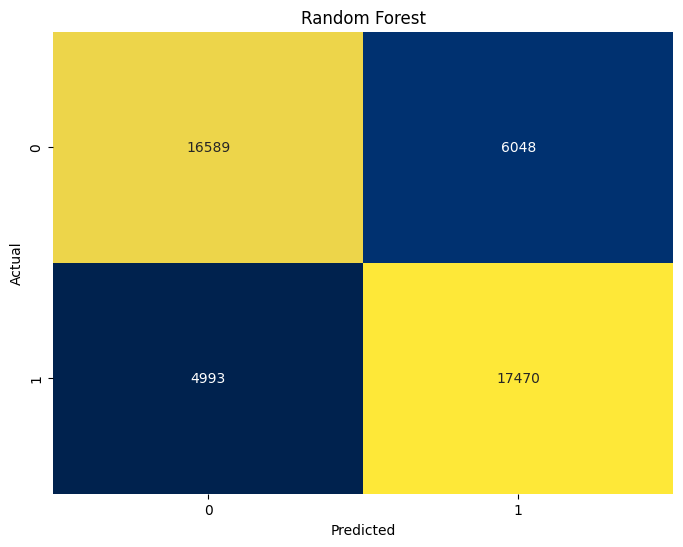

In [216]:
plt.figure(figsize=(8, 6))
# annot @ menentukan nilai sebenarnya akan ditampilkan pd sel heatmap or tdk
# fmt @ dalam bentuk format desimal
# cbar @ color bar
sns.heatmap(conf_matrix_rf2, annot=True, fmt="d", cmap = 'cividis', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest')
plt.show()

In [217]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test2, pred_rf2))
print(precision_score(y_test2, pred_rf2))
print(recall_score(y_test2, pred_rf2))
print(f1_score(y_test2, pred_rf2))

0.7551884700665189
0.7428352751084276
0.7777233673151405
0.7598790804897675


In [251]:
# XGB Classifier
from xgboost import XGBClassifier

In [252]:
model_xgboost2 = XGBClassifier()
model_xgboost2.fit(X_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [253]:
pred_xgboost2 = model_xgboost2.predict(X_test2)

In [254]:
print(classification_report(pred_xgboost2, y_test2))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74     23444
           1       0.71      0.74      0.73     21656

    accuracy                           0.73     45100
   macro avg       0.73      0.73      0.73     45100
weighted avg       0.73      0.73      0.73     45100



In [255]:
conf_matrix_xgboost2 = confusion_matrix(y_test2, pred_xgboost2)
print(conf_matrix_xgboost2)

[[17020  5617]
 [ 6424 16039]]


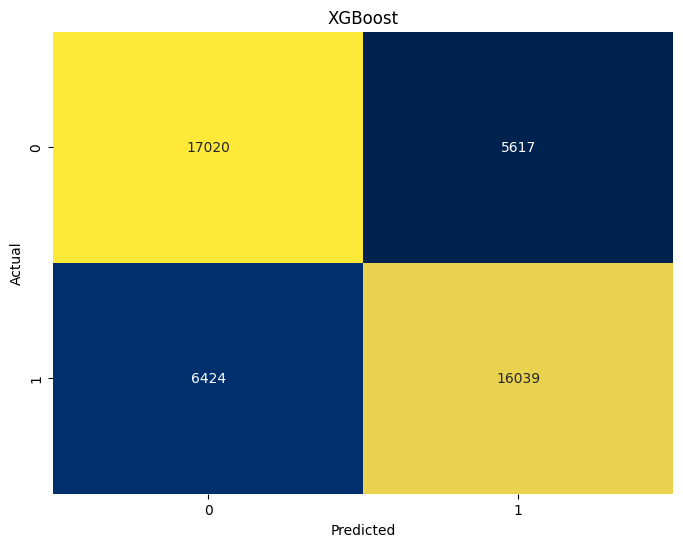

In [256]:
plt.figure(figsize=(8, 6))
# annot @ menentukan nilai sebenarnya akan ditampilkan pd sel heatmap or tdk
# fmt @ dalam bentuk format desimal
# cbar @ color bar
sns.heatmap(conf_matrix_xgboost2, annot=True, fmt="d", cmap = 'cividis', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost')
plt.show()

In [257]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test2, pred_xgboost2))
print(precision_score(y_test2, pred_xgboost2))
print(recall_score(y_test2, pred_xgboost2))
print(f1_score(y_test2, pred_xgboost2))

0.7330155210643016
0.740626154414481
0.714018608378222
0.7270790362428885


In [ ]:
# dengan pendekatan MinMaxScaler model yg memiliki hasil terbaik @  Random Forest

In [258]:
dataAcc = {'Model': ['Lg','Rf','XGb'],
        'ACC':[accuracy_score(y_test2,pred_lg2),
               accuracy_score(y_test2,pred_rf2),
               accuracy_score(y_test2,pred_xgboost2)]}

In [259]:
final_dataAcc = pd.DataFrame(dataAcc)
final_dataAcc


,Model,ACC
0,Lg,0.687029
1,Rf,0.755188
2,XGb,0.733016


In [260]:
dataPre = {'Model': ['Lg','Rf','XGb'],
        'PRE':[precision_score(y_test2,pred_lg2),
               precision_score(y_test2,pred_rf2),
               precision_score(y_test2,pred_xgboost2)]}

In [261]:
final_dataPre = pd.DataFrame(dataPre)
final_dataPre

,Model,PRE
0,Lg,0.804050
1,Rf,0.742835
2,XGb,0.740626


In [262]:
dataRec = {'Model': ['Lg','Rf','XGb'],
        'REC':[recall_score(y_test2,pred_lg2),
               recall_score(y_test2,pred_rf2),
               recall_score(y_test2,pred_xgboost2)]}

In [263]:
final_dataRec = pd.DataFrame(dataRec)
final_dataRec

,Model,REC
0,Lg,0.491386
1,Rf,0.777723
2,XGb,0.714019


In [264]:
dataF1 = {'Model': ['Lg','Rf','XGb'],
        'F1':[f1_score(y_test2,pred_lg2),
               f1_score(y_test2,pred_rf2),
              f1_score(y_test2,pred_xgboost2)]}

In [265]:
final_dataF1 = pd.DataFrame(dataF1)
final_dataF1

,Model,F1
0,Lg,0.609986
1,Rf,0.759879
2,XGb,0.727079


# **Hyperparameter Tunning**

In [ ]:
# Hyperparameter Tunning - meningkatkan kinerja model
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.pipeline import Pipeline

if RUN_HYPERPARAMETER_SEARCH :
  start_time_search = time.time()

  X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = RANDOM_STATE)

  rf_hp = RandomForestClassifier()

  pipeline = Pipeline(steps = [('rf', rf_hp)])

  param_grid = {
      'rf__n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
  }

  grid_search = GridSearchCV(pipeline, param_grid, cv = 5) #proses training dan validasi diuji 5x

  grid_search.fit(X_train, y_train) # Tahap pencarian parameter terbaik dr dataset
  print('Best Parameters: {}'. format(grid_search.best_params_))

  end_time = time.time()
  print('Waktu pencarian = {}'. format(end_time - start_time_search))